### Business Problem:
A million dollar company's CEO wants to know why his employees are leaving.

### Client:
The CEO of the Company

#### My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.

### Part 1: Obtaining the Data

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/apple/Downloads/HR_comma_sep.csv', index_col=None)

### Part 2: Cleaning the Data

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [4]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
evaluation               False
project_count            False
average_monthly_hours    False
years_at_company         False
Work_accident            False
turnover                 False
promotion                False
department               False
salary                   False
dtype: bool

In [5]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Renaming certain columns for better readability
df = df.rename(columns={'last_evaluation': 'evaluation',
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [7]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### Part 3: Exploratory Data Analysis

#### 3a. Statistical Overview
The dataset has:

1. About 15,000 employee observations and 10 features 
2. The company had a turnover rate of about 24%
3. Mean satisfaction of employees is 0.61

In [8]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [9]:
# Check the type of our features. 
df.dtypes

turnover                   int64
satisfaction_level       float64
evaluation               float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
Work_accident              int64
promotion                  int64
department                object
salary                    object
dtype: object

In [10]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [11]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [12]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### 3b. Correlation Matrix & Heatmap

**Highly correlated features:**

1. (+) projectCount & averageMonthlyHours & evaluation
2. (-) turnover & satisfaction

**Questions:**

1. What features affect our target variable the most (turnover)?
2. What features have strong correlations with each other?
3. Can we do a more in depth examination of these features?

**Summary:**
From the heatmap, there seems to be heavy **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
project_count,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_monthly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
years_at_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


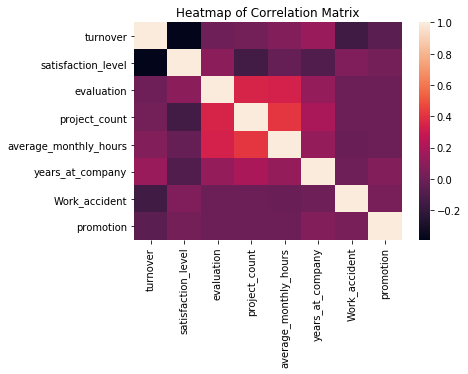

In [14]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

#### 3c. Distribution Plots (Satisfaction - Evaluation - Average Monthly Hours)

**Summary**: Let's examine the distribution on some of the employee's features. Here's what I found:

* **Satisfaction** - There seems to be a huge spike for employees with low satisfaction and high satisfaction.
* **Evaluation** - There seems to be a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
* **AverageMonthlyHours** - There seems to be another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
* The evaluation and average monthly hour graphs both seem to share a similar distribution.
* Maybe employees with lower average monthly hours were evaluated less and vice versa.
* If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

**Questions:**
* Is there a reason for the high spike in low satisfaction of employees?
* Could employees be grouped in a way with these features?
* Is there a correlation between evaluation and averageMonthlyHours?

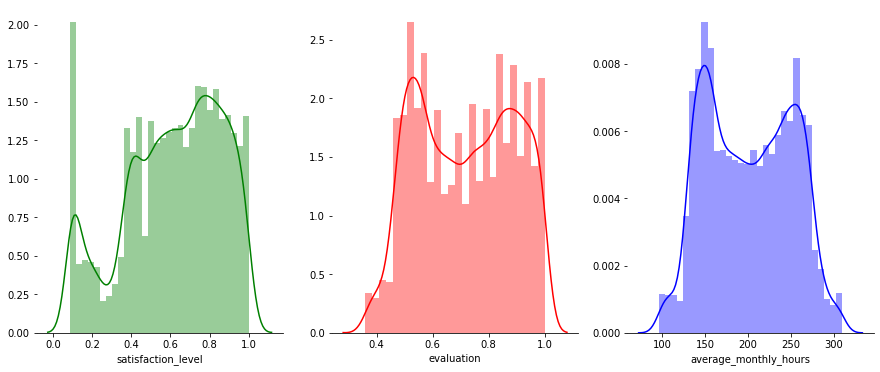

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.despine(left=True)

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=True, color="g", ax=axes[0])

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=True, color="r", ax=axes[1])

# Graph Employee Average Monthly Hours
sns.distplot(df.average_monthly_hours, kde=True, color="b", ax=axes[2])

#### 3d. Salary V.S. Turnover

**Summary**: This is not unusual. Here's what I found:

* Majority of employees who left either had low or medium salary.
* Barely any employees left with high salary
* Employees with low to average salaries tend to leave the company.

**Questions:**
* What is the work environment like for low, medium, and high salaries?
* What made employees with high salaries to leave?

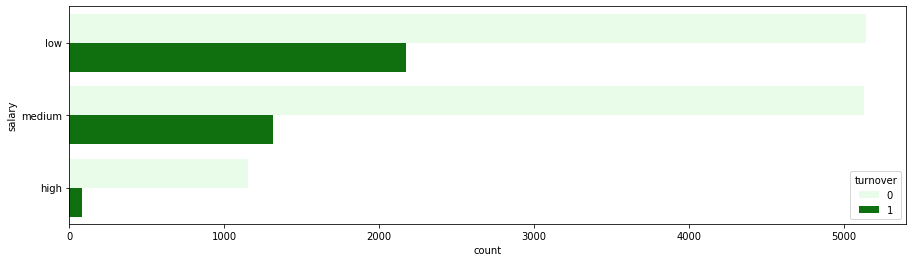

In [20]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df, color="g");

#### 3e. Department V.S. Turnover


**Summary:** Let's see which department . Here's what I found:

* The sales, technical, and support department were the top 3 departments to have employee turnover
* The management department had the smallest amount of turnover

**Questions:**
If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

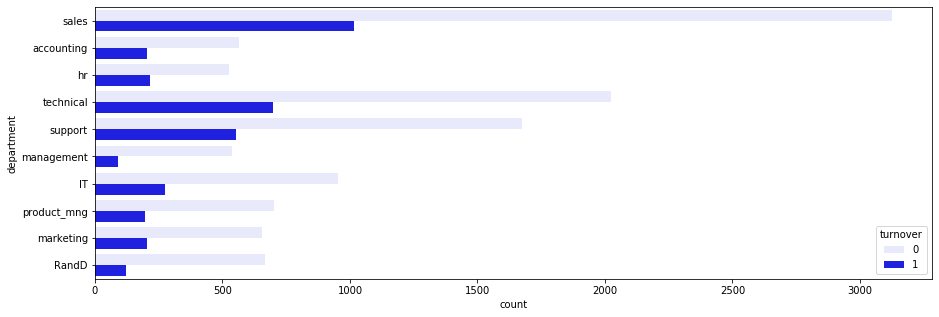

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df, color="b");

#### 3f. Turnover V.S. ProjectCount

**Summary:** This graph is quite interesting as well. Here's what I found:

* More than half of the employees with 2,6, and 7 projects left the company
* Majority of the employees who did not leave the company had 3,4, and 5 projects
* All of the employees with 7 projects left the company
* There is an increase in employee turnover rate as project count increases

**Questions:**

* Why are employees leaving at the lower/higher spectrum of project counts?
* Maybe this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
* Maybe employees with 6+ projects are getting overworked, thus leaving the company?

[Text(0, 0.5, 'Percent')]

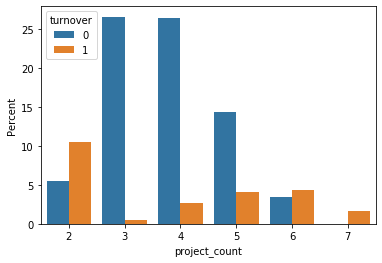

In [23]:
ax = sns.barplot(x="project_count", y="project_count", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

#### 3g. Turnover V.S. Evaluation

**Summary:**

* There seems to be a biomodal distrubtion for those that had a turnover.
* Employees with low performance tend to leave the company more
* Employees with high performance tend to leave the company more
* The sweet spot seems for those that stayed seems to be within 0.6-0.8

Text(0.5, 1.0, 'Last evaluation')

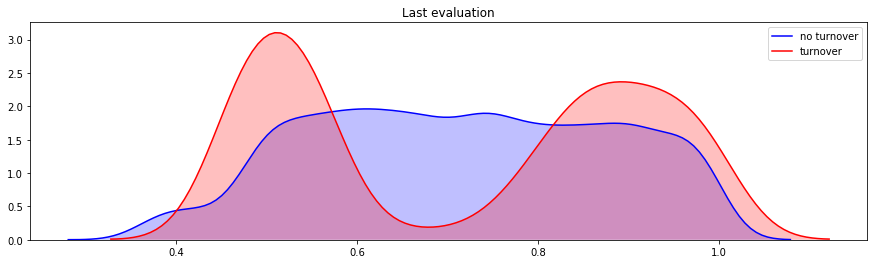

In [24]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

#### 3h. Turnover V.S. AverageMonthlyHours

**Summary:**

* Another bi-modal distrubtion for employees that turnovered
* Employees who had less hours of work (~150hours or less) left the company more
* Employees who had too many hours of work (~250 or more) left the company
* Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Average monthly hours worked')

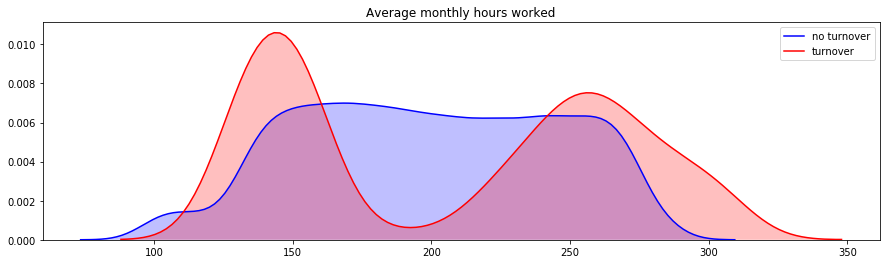

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'average_monthly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'average_monthly_hours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

#### 3i. ProjectCount VS AverageMonthlyHours

**Summary:**

* As project count increased, so did average monthly hours
* Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
* Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
* In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

**Questions:**

* What could be the meaning for this?
* Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

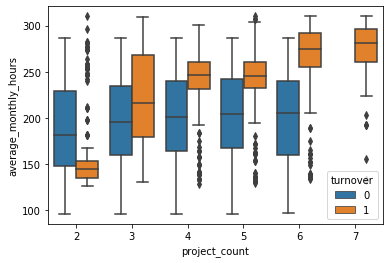

In [27]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month
sns.boxplot(x="project_count", y="average_monthly_hours", hue="turnover", data=df)

#### 3j. ProjectCount VS Evaluation

**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There seems to be an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

**Questions:**

* Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count?
* Shouldn't employees with lower evaluations tend to leave the company more?

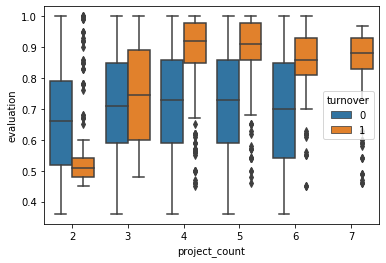

In [29]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
sns.boxplot(x="project_count", y="evaluation", hue="turnover", data=df)

#### 3k. Satisfaction VS Evaluation

**Summary:** This is by far the most compelling graph. This is what I found:
* There is 3 distinct clusters for employees who left the company

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
* **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
* **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.
* **Question:** Could this cluser mean that employees left because they found another job opportunity?

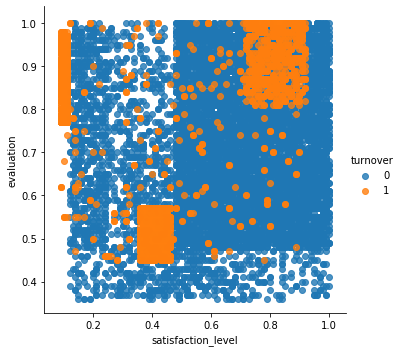

In [30]:
sns.lmplot(x='satisfaction_level', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

### 4. Interpreting the Data

**Summary:** With all of this information, this is what CEO should know about his company and why his employees probably left:

1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
4. Employees with **low to medium salaries** are the bulk of employee turnover
5. Employees that had **2,6, or 7** project count was at risk of leaving the company
6. Employee **satisfaction is the highest indicator for employee turnover**.

**Potential Solution:** Since satisfaction had the most effect in determining employee turnover, the underlying problem can be generalized down to a personal level. Or maybe the problem is not with the employees, but persist in a deeper level of the company (their core values and purpose).

Develop learning programs for managers -> Then use analytics to gauge their performance and measure progress:

* Empower the team and do not micromanage
* Express interest for team member success
* Have clear vision / strategy for team
* Help team with career development
